# COMPARING MY AMERICAN VS GERMAN TWITTER NETWORKS
### VISUALIZING THE DATA

# Step 0: 
### Importing libraries and the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn: change palette and style 
sns.set_palette('Set3')
# sns.set_style("whitegrid")
sns.set_style('darkgrid')

# Try different seaborn palette: Set3, cool, winter_r

In [2]:
# Import the english language and german language tweets separately, as well as the combined (processed) df:
tweets_en = pd.read_csv('tweets_en.csv')
tweets_de = pd.read_csv('tweets_de.csv')
tweets_analysis = pd.read_csv('tweets_analysis.csv')

In [3]:
tweets_en.drop('Unnamed: 0', axis=1, inplace=True)
tweets_de.drop('Unnamed: 0', axis=1, inplace=True)
tweets_analysis.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Subset for just positive and negative tweets:
tweets_vis = tweets_analysis[tweets_analysis['Sentiment']!='neutral']

In [5]:
tweets_vis.head()

,TweetText,Handle,Location,Country,Gender,Language,text_processed,Polarity,Subjectivity,Sentiment
0,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,female,en,"['daili', 'goal', 'wake', 'earli', 'drink', 'c...",0.194048,0.427381,positive
1,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,female,en,"['good', 'topic', 'well', 'done']",0.700000,0.600000,positive
2,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,female,en,"['jpbrice', 'life', 'alway', 'precious', 'ever...",0.272381,0.609524,positive
3,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,female,en,"['petershepherd', 'myork', 'zereadyoregon', 'g...",0.200000,0.385417,positive
4,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,female,en,"['never', 'know', 'strong', 'strong', 'onli', ...",0.288889,0.822222,positive


# Step 1:
### Visualize the polarity of German-language versus English-language Tweets (re: sentiment):

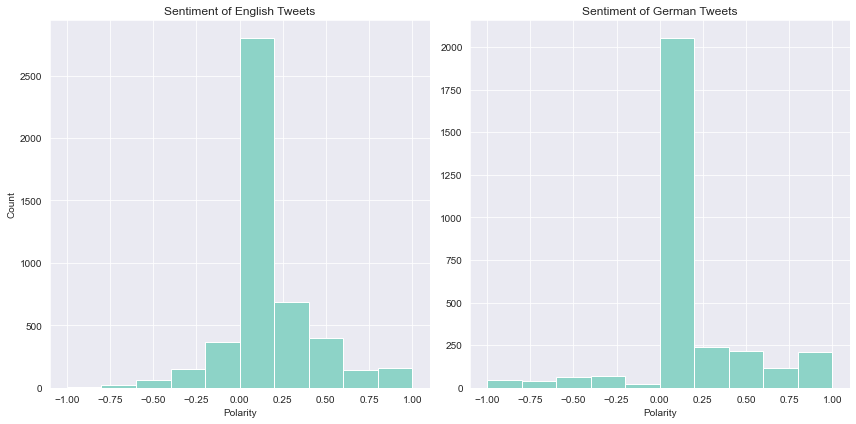

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(tweets_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(tweets_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
# plt.savefig()
plt.show()

#### Remove middle polarity values and visualize just extremes to compare:

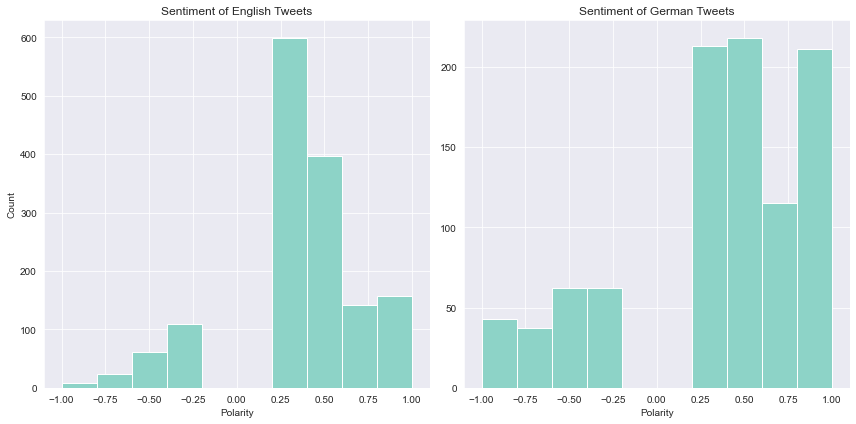

In [7]:
pol_extremes_en = tweets_en[(tweets_en['Polarity'] <= -0.25)|(tweets_en['Polarity'] >= 0.25)]
pol_extremes_de = tweets_de[(tweets_de['Polarity'] <= -0.25)|(tweets_de['Polarity'] >= 0.25)]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(pol_extremes_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(pol_extremes_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
# plt.savefig('polarity_by_country.png')
plt.show()

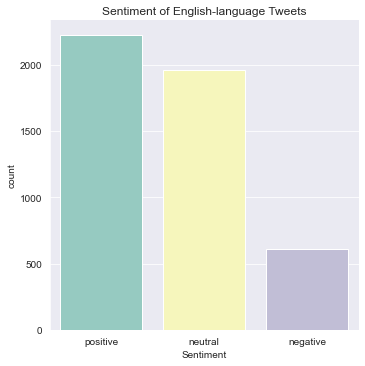

In [8]:
sns.catplot(x='Sentiment', kind='count', data=tweets_en, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of English-language Tweets')
# plt.savefig('sentiment_en_tweets.png')
plt.show()

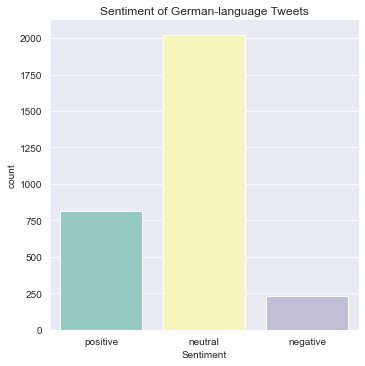

In [9]:
sns.catplot(x='Sentiment', kind='count', data=tweets_de, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of German-language Tweets')
# plt.savefig('sentiment_de_tweets.png')
plt.show()

# Step 2:
### Compare the general sentiment of tweets from German versus American network:

Remember: There are more tweets from German network than from the American network. Find the ratio of each sentiment from all tweets from that region, and compare the ratio rather than absolute tweets. (Last visualizations of Step 2.) 


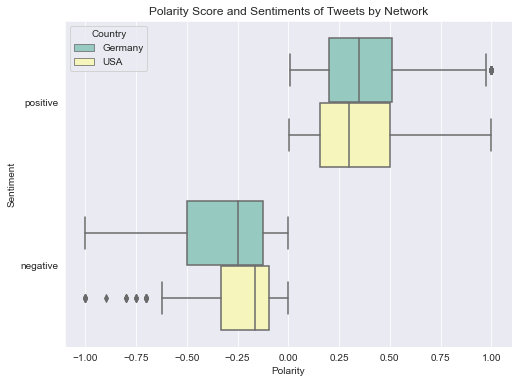

In [10]:
# Polarity score
# Without neutral tweets
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Polarity', y='Sentiment', data=tweets_vis, hue='Country')
plt.title('Polarity Score and Sentiments of Tweets by Network')
plt.savefig('polarity_by_Country_boxchart.png')
plt.show()

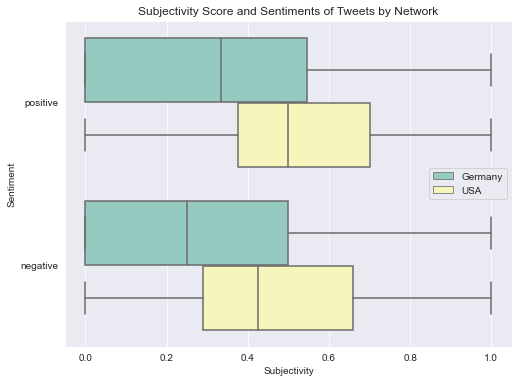

In [36]:
# Subjectivity score
# Without neutral tweets 

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Subjectivity', y='Sentiment', data=tweets_vis, hue='Country')
plt.title('Subjectivity Score and Sentiments of Tweets by Network')
plt.legend(loc='center right')
plt.savefig('subjectivity_by_country_boxchart.png')
plt.show()

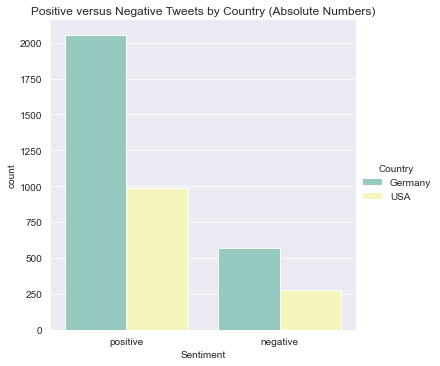

In [11]:
# Without neutral tweets

sns.catplot(x='Sentiment', kind='count', data=tweets_vis, hue='Country')
plt.title('Positive versus Negative Tweets by Country (Absolute Numbers)')
plt.show()

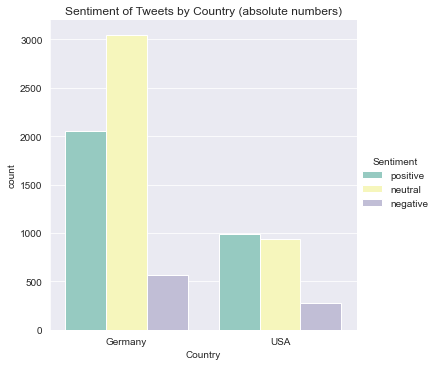

In [12]:
sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_analysis)
plt.title('Sentiment of Tweets by Country (absolute numbers)')
# plt.savefig('sentiment_by_country.png')
plt.show()

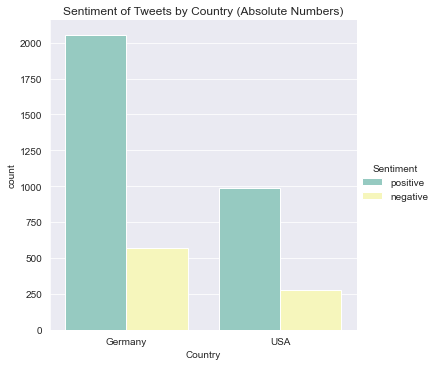

In [13]:
# Without neutral tweets

sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_vis)
plt.title('Sentiment of Tweets by Country (Absolute Numbers)')
plt.show()

### Compare relative values rather than absolute:

Sentiment,negative,neutral,positive
Country,,,
Germany,10.012361,53.752428,36.235211
USA,12.585189,42.480691,44.934121


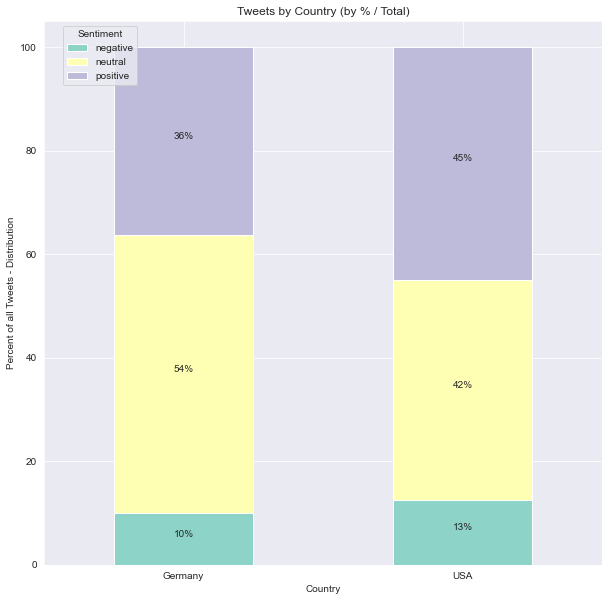

In [14]:
# % of sentiment by Country:

ax= pd.crosstab(tweets_analysis['Country'], tweets_analysis['Sentiment']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Sentiment")

plt.xlabel('Country')
plt.ylabel('Percent of all Tweets - Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.title('Tweets by Country (by % / Total)')
plt.savefig("relative_tweets_country")
plt.show()

# Step 3:
### Adding the Gender Dimension to Analysis:

In [20]:
# Drop Gender='unknown' (organizations, institutions) from df:
tweets_vis_gen = tweets_vis[tweets_vis['Gender']!='unknown']
tweets_analysis_gen = tweets_analysis[tweets_analysis['Gender']!='unknown']

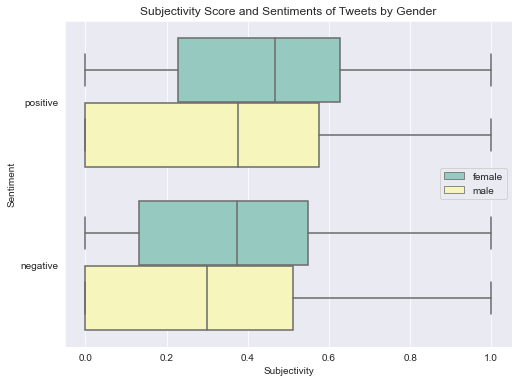

In [16]:
# Subjectivity of tweets by Gender (not country specific):

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Subjectivity', y='Sentiment', data=tweets_vis_gen, hue='Gender')
plt.title('Subjectivity Score and Sentiments of Tweets by Gender')
plt.legend(loc='center right')
plt.savefig('subjectivity_by_gender_boxchart.png')
plt.show()

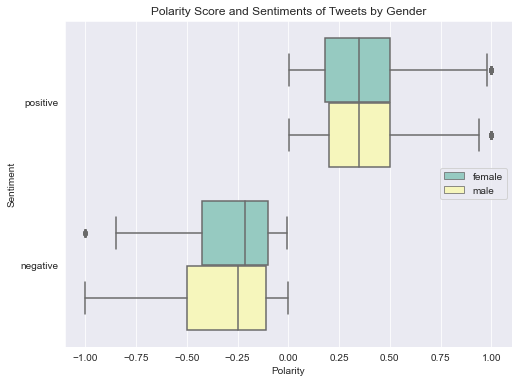

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Polarity', y='Sentiment', data=tweets_vis_gen, hue='Gender')
plt.title('Polarity Score and Sentiments of Tweets by Gender')
plt.legend(loc='center right')
plt.savefig('polarity_by_gender_boxchart.png')
plt.show()

In [18]:
grouped_gender = tweets_analysis.groupby(['Gender', 'Country']).mean()
grouped_gender

Polarity  Subjectivity
Gender  Country                        
female  Germany  0.119923      0.204596
        USA      0.143956      0.331593
male    Germany  0.120329      0.176734
        USA      0.113888      0.323104
unknown Germany  0.124469      0.149589
        USA      0.099253      0.336990

Sentiment,negative,neutral,positive
Gender,,,
female,11.285631,47.440372,41.273997
male,10.896159,51.778094,37.325747


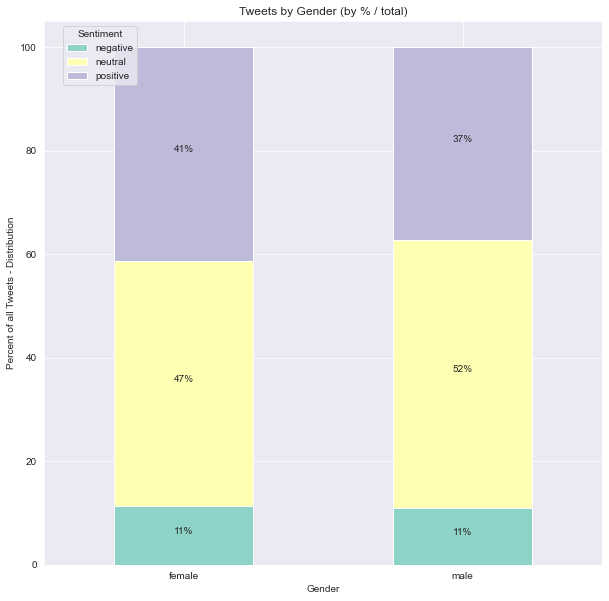

In [21]:
# % of sentiment by gender:

ax= pd.crosstab(tweets_analysis_gen['Gender'], tweets_analysis_gen['Sentiment']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Sentiment")

plt.xlabel('Gender')
plt.ylabel('Percent of all Tweets - Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.title('Tweets by Gender (by % / total)')
plt.savefig('relative_tweets_gender')
plt.show()

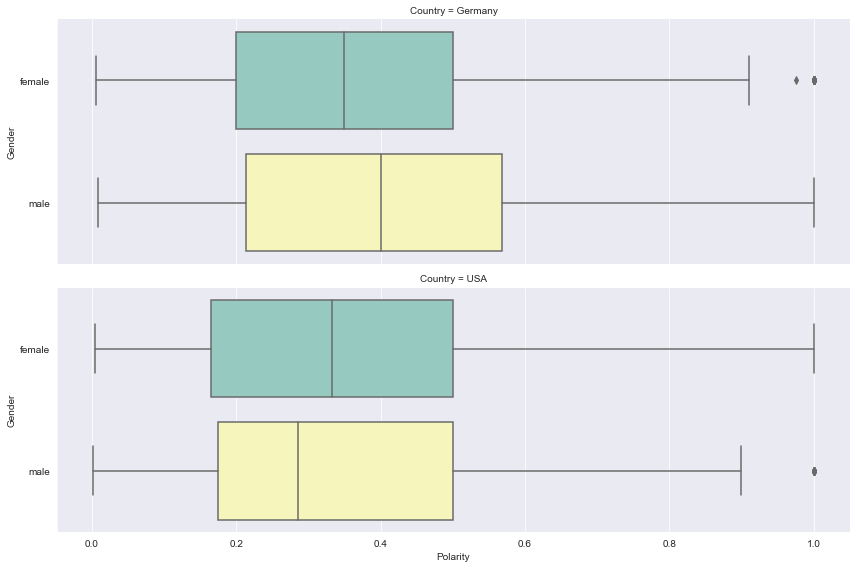

In [22]:
# Somehow compare Gender/Country/Sentiment:

sns.catplot(x="Polarity", y="Gender", row="Country",
                kind="box", orient="h", height=4, aspect=3,
                data=tweets_vis_gen[(tweets_vis_gen['Sentiment']=='positive')])
# plt.title('Comaparing Gender and Country')
plt.savefig('gender_country_box.png')
plt.show()